In [4]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [ ]:
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


In [ ]:
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [ ]:
rice_cammeo_and_osmancik_dataset = get_data('rice_cammeo_and_osmancik')

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
rice_cammeo_and_osmancik_dataset.to_csv("rice_cammeo_and_osmancik.csv")
from google.colab import files

In [ ]:
files.download('rice_cammeo_and_osmancik.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**kMeans Clustering**

In [ ]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(rice_cammeo_and_osmancik)

,Description,Value
0,Session id,214
1,Original data shape,"(748, 5)"
2,Transformed data shape,"(748, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Recency,Frequency,Monetary,Time,Class,Cluster
0,2,50,12500,98,1,Cluster 2
1,0,13,3250,28,1,Cluster 1
2,1,16,4000,35,1,Cluster 1
3,2,20,5000,45,1,Cluster 1
4,1,24,6000,77,0,Cluster 1
...,...,...,...,...,...,...
743,23,2,500,38,0,Cluster 0
744,21,2,500,52,0,Cluster 0
745,23,3,750,62,0,Cluster 0
746,39,1,250,39,0,Cluster 0


In [ ]:
kMeanPrediction.to_csv("KMeanResult.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


In [ ]:
from google.colab import files
files.download('KMeanResult.csv')      # Uncomment this line
# Open and Explore result file (KMeanResult.csv).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [ ]:
from google.colab import files
# files.download('kMeanClusteringModelFile.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CLUSTERING**

In [ ]:
newData = get_data("rice_cammeo_and_osmancik").iloc[:10]

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Recency,Frequency,Monetary,Time,Class,Cluster
0,2.0,50.0,12500.0,98.0,1.0,Cluster 3
1,0.0,13.0,3250.0,28.0,1.0,Cluster 1
2,1.0,16.0,4000.0,35.0,1.0,Cluster 1
3,2.0,20.0,5000.0,45.0,1.0,Cluster 1
4,1.0,24.0,6000.0,77.0,0.0,Cluster 1
5,4.0,4.0,1000.0,4.0,0.0,Cluster 2
6,2.0,7.0,1750.0,14.0,1.0,Cluster 0
7,1.0,12.0,3000.0,35.0,0.0,Cluster 1
8,2.0,9.0,2250.0,22.0,1.0,Cluster 0
9,5.0,46.0,11500.0,98.0,1.0,Cluster 3


**Evaluating Cluster Model**

In [ ]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# 2D plot
plot_model(KMeanClusteringModel, plot='cluster')

In [ ]:
#3D plot
plot_model(KMeanClusteringModel, plot = 'tsne')

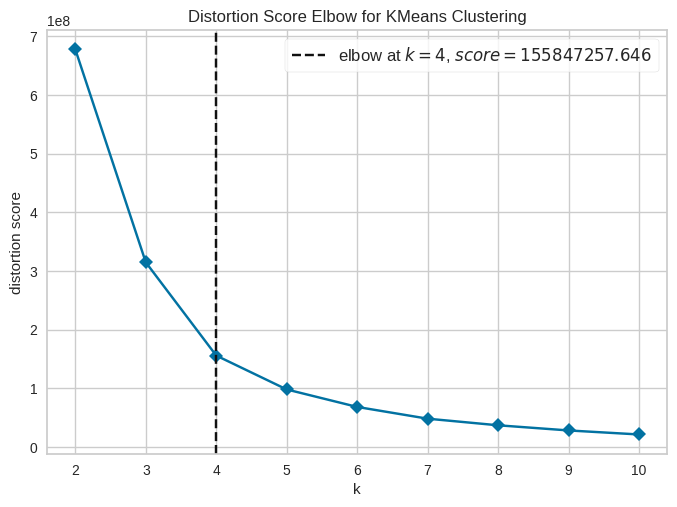

In [ ]:
#Elbow Plot
plot_model(KMeanClusteringModel, plot = 'elbow')

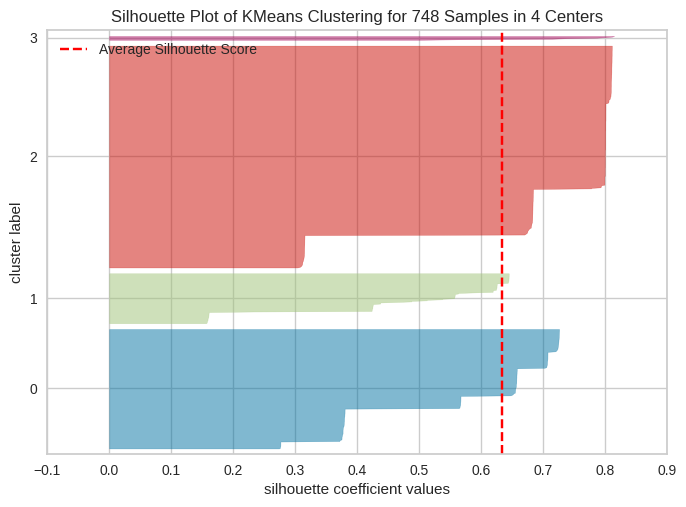

In [ ]:
#Silhouette Plot
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [ ]:
# Distribution Plot
plot_model(KMeanClusteringModel, plot = 'distribution')

# **Clustering (KMean)**

In [ ]:

# For Cluster = 3, 4, 5, 6
from pycaret.datasets import get_data
from pycaret.clustering import *

rice_cammeo_and_osmancik_dataset = get_data('rice_cammeo_and_osmancik', verbose=False)
setup(data = rice_cammeo_and_osmancik_dataset, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,1514.8713,0.4462,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6236,2829.6787,0.4866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6287,3311.6492,0.4587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

# Create an empty list to store model summaries
model_summaries = []

# Iterate through different cluster numbers
for num_clusters in [3, 4, 5, 6]:
    print(f"For Cluster = {num_clusters}")

    # Create the KMeans model
    model = create_model('kmeans', num_clusters=num_clusters)

    # Get the model summary as a DataFrame
    model_summary = pull()

    # Create a new DataFrame with Cluster Number as the first column
    model_summary.insert(0, "Cluster Number", num_clusters)

    # Append the model summary to the list
    model_summaries.append(model_summary)

# Concatenate all model summaries into a single table
combined_table = pd.concat(model_summaries)

# Display the combined table
print(combined_table)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6382,4632.8802,0.5152,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5782,4804.2767,0.5701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.7393          3567.5370          0.3435            0   
0               4      0.7207          5011.8115          0.4114            0   
0               5      0.6382          4632.8802          0.5152            0   
0               6      0.5782          4804.2767          0.5701            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# ***Clustering: "Data Preprocessing"***

In [ ]:
from pycaret.clustering import *
from pycaret.datasets import get_data

rice_cammeo_and_osmancik_dataset = get_data('rice_cammeo_and_osmancik')

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


**Model Performance using "Normalization"**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3878,352.1389,1.0153,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

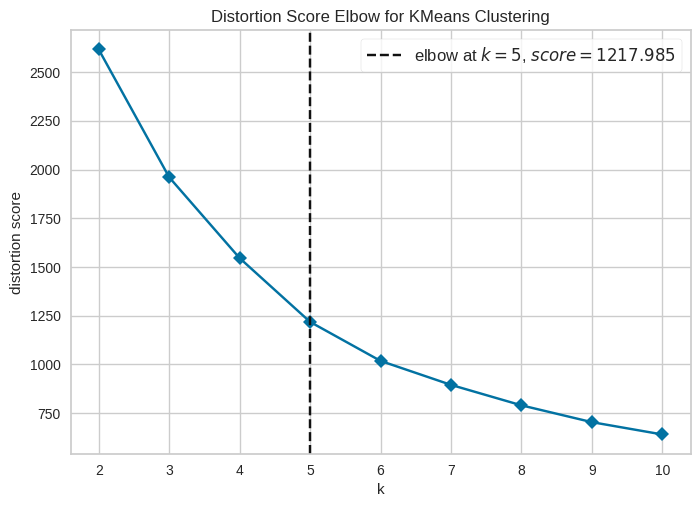

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3924,338.0734,0.9670,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3878,352.1389,1.0153,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3558,384.7761,0.8980,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3670,396.8543,0.9458,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



In [ ]:
#3D Plot for Cluster = 5
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3552,384.6225,0.9028,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation"



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,1463.8636,0.7364,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

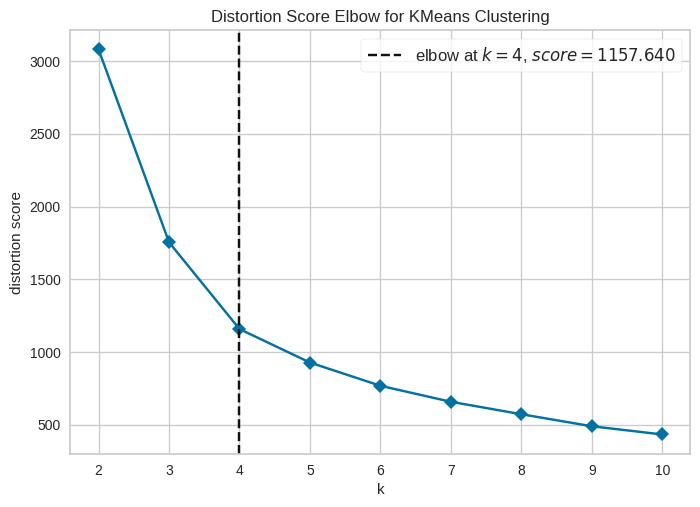

In [ ]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [ ]:
# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4606,1323.9664,0.6839,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4468,1463.8201,0.7356,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4068,1414.6063,0.8973,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4186,1396.5028,0.8394,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4606,1323.9664,0.6839,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4468,1463.8201,0.7356,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4068,1414.6063,0.8973,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4186,1396.5028,0.8394,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.4606          1323.9664          0.6839            0   
0               4      0.4468          1463.8201          0.7356            0   
0               5      0.4068          1414.6063          0.8973            0   
0               6      0.4186          1396.5028          0.8394            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# Model Performance using "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

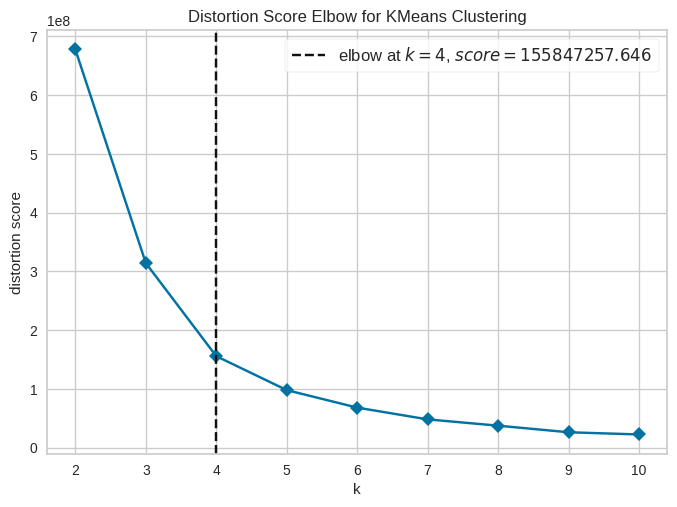

In [ ]:
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [ ]:
#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,1514.8713,0.4462,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6236,2829.6787,0.4866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6237,3318.6705,0.4631,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,1514.8713,0.4462,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6236,2829.6787,0.4866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6237,3318.6705,0.4631,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.6703          1514.8713          0.4462            0   
0               4      0.6329          2286.0617          0.4555            0   
0               5      0.6236          2829.6787          0.4866            0   
0               6      0.6237          3318.6705          0.4631            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# Model Performance using "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3627,444.1037,1.0558,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

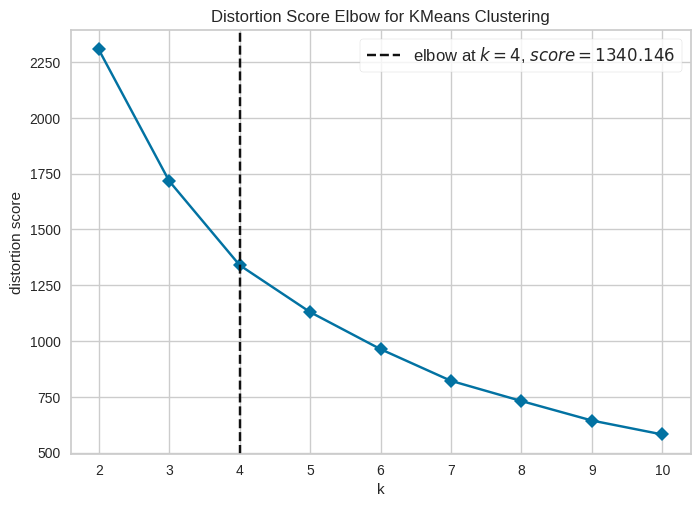

In [ ]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3606,438.8009,1.0587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3625,444.0673,1.0562,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3577,429.0193,1.0774,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3724,427.2988,0.9885,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3606,438.8009,1.0587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3625,444.0673,1.0562,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3577,429.0193,1.0774,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3724,427.2988,0.9885,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.3606           438.8009          1.0587            0   
0               4      0.3625           444.0673          1.0562            0   
0               5      0.3577           429.0193          1.0774            0   
0               6      0.3724           427.2988          0.9885            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# Model Performance using "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3627,444.1037,1.0558,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

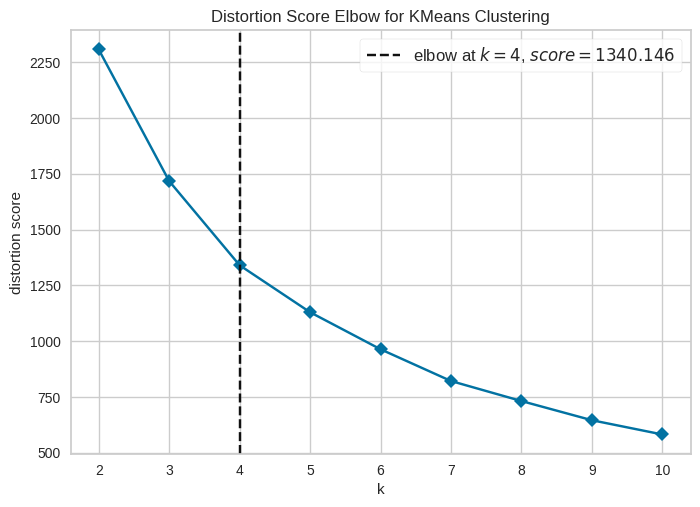

In [ ]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3606,438.8009,1.0587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3627,444.1037,1.0558,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3573,429.0372,1.0766,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3721,427.3098,0.9899,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Other Clustering Techniques

**Hierarchical**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

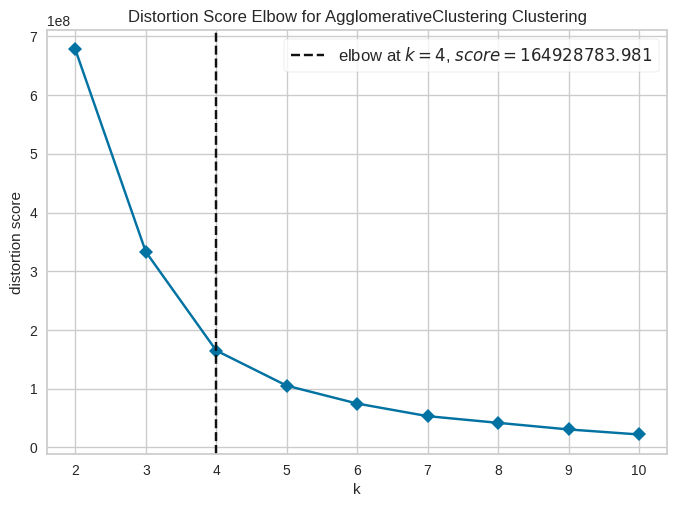

In [ ]:
from pycaret.datasets import get_data
from pycaret.clustering import *

riceDataSet = get_data('rice_cammeo_and_osmancik', verbose=False)
setup(data = riceDataSet, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
hierarchicalModel = create_model('hclust', num_clusters=4)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Recency,Frequency,Monetary,Time,Class,Cluster
0,2,50,12500,98,1,Cluster 2
1,0,13,3250,28,1,Cluster 0
2,1,16,4000,35,1,Cluster 0
3,2,20,5000,45,1,Cluster 0
4,1,24,6000,77,0,Cluster 0
...,...,...,...,...,...,...
743,23,2,500,38,0,Cluster 3
744,21,2,500,52,0,Cluster 3
745,23,3,750,62,0,Cluster 3
746,39,1,250,39,0,Cluster 3


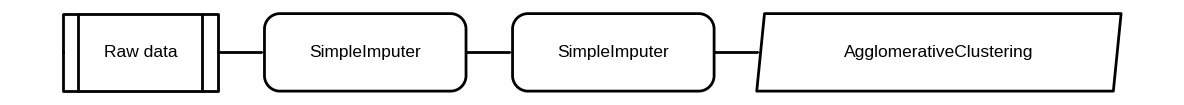

In [ ]:
evaluate_model(hierarchicalModel)

In [ ]:
from pycaret.datasets import get_data
from pycaret.clustering import *

riceDataSet = get_data('rice_cammeo_and_osmancik', verbose=False)
setup(data = riceDataSet, verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6857,1408.0363,0.4078,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6223,2627.2889,0.4452,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5819,3016.3578,0.4655,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3276,292.7172,1.2229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

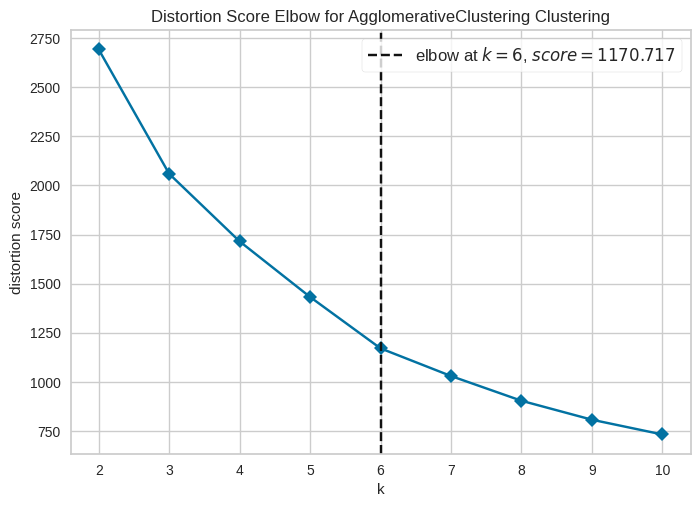

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3671,303.9923,0.9804,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3276,292.7172,1.2229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3370,299.2442,1.0968,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3391,325.6823,1.0429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4308,1343.8221,0.7311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

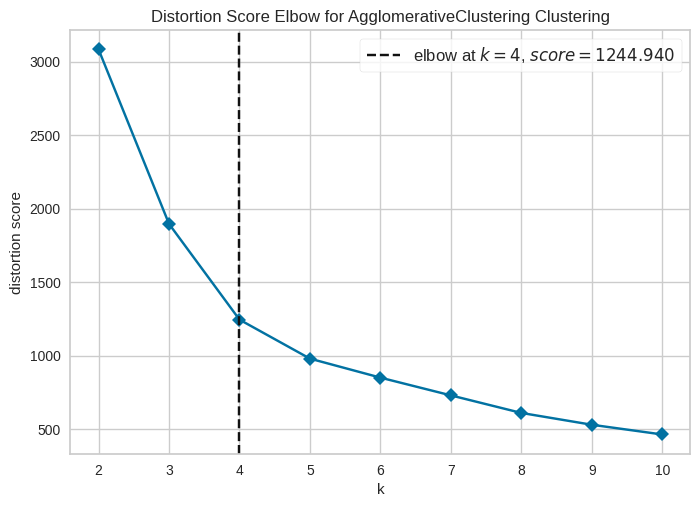

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4762,1197.1983,0.6522,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4308,1343.8221,0.7311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3914,1329.1809,0.8872,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3869,1245.9280,1.0200,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

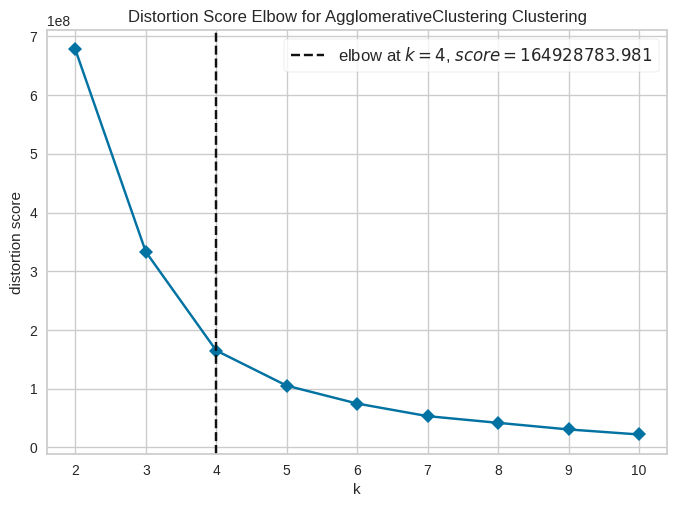

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6857,1408.0363,0.4078,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6223,2627.2889,0.4452,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5819,3016.3578,0.4655,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)


# Transformation" + "Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3353,399.8025,1.1350,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

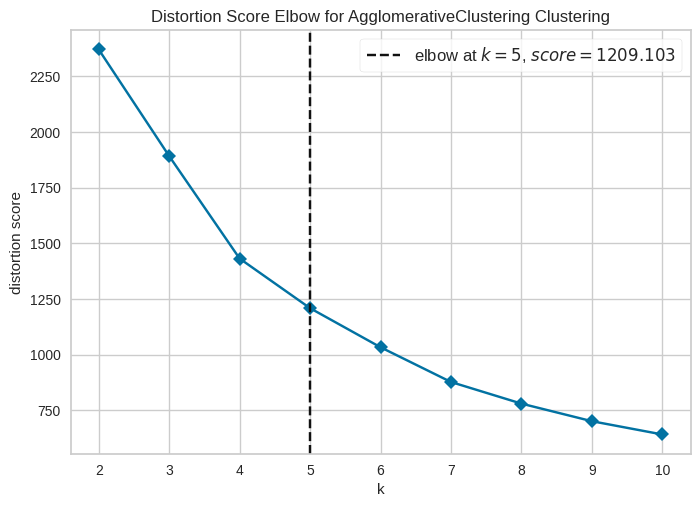

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3169,363.9314,1.0523,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3353,399.8025,1.1350,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3580,388.8123,0.9901,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3496,388.5256,0.9741,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)




# "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3353,399.8025,1.1350,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

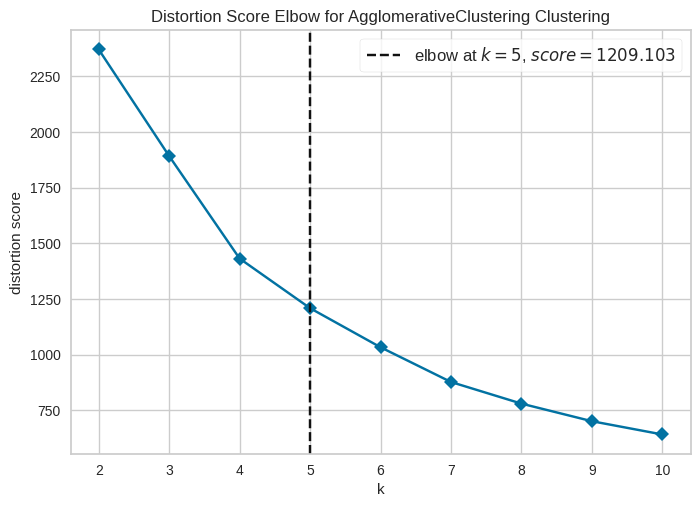

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3169,363.9314,1.0523,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3353,399.8025,1.1350,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3580,388.8123,0.9901,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3496,388.5256,0.9741,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
y = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
z = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
w = create_model('hclust', num_clusters = 6)



# Mean shift clustering              'meanshift'

In [8]:
from pycaret.datasets import get_data
from pycaret.clustering import *

rice_cammeo_and_osmancik_dataset = get_data('rice_cammeo_and_osmancik', verbose=False)
setup(data = riceDataSet, verbose=False)

x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6062,1177.4891,0.4348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6062,1177.4891,0.4348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6062,1177.4891,0.4348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6062,1177.4891,0.4348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6062,1177.4891,0.4348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,129.0583,0.7865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,129.0583,0.7865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,129.0583,0.7865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,129.0583,0.7865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,129.0583,0.7865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,791.1889,0.6844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,791.1889,0.6844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,791.1889,0.6844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,791.1889,0.6844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,791.1889,0.6844,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
#PCA
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = rice_cammeo_and_osmancik_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6077,1180.0224,0.4311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6077,1180.0224,0.4311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6077,1180.0224,0.4311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6077,1180.0224,0.4311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6077,1180.0224,0.4311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')


setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)




,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

setup(data = rice_cammeo_and_osmancik_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
y = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
z = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
w = create_model('meanshift', num_clusters = 6)



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3081,236.7342,1.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]